<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/word2vec/co_occurence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Матрица совместной встречаемости

**Совместная встречаемость**:
- как часто токены встречаются в общем контексте

**Формальное определение задачи**
- дано слово $w_i$
- дано окружение слова - контекст
  - контекстное окно размерности $n$
    - $n$ слов слева от $w_i$
    - $n$ слов справа от $w_i$

**Матрица совместной встречаемости $M$**
- симметричная пословная матрица
- $M_{ij}$ - сколько раз $w_j$ встречается внутри контекстного окна $w_i$

**Пример**

- n = 1
- Doc1: "all that glitters is not gold"
- Doc2: "all is well that ends well"


|     *    | `<START>` | all | that | glitters | is   | not  | gold  | well | ends | `<END>` |
|----------|-------|-----|------|----------|------|------|-------|------|------|-----|
| `<START>`    | 0     | 2   | 0    | 0        | 0    | 0    | 0     | 0    | 0    | 0   |
| all      | 2     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| that     | 0     | 1   | 0    | 1        | 0    | 0    | 0     | 1    | 1    | 0   |
| glitters | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| is       | 0     | 1   | 0    | 1        | 0    | 1    | 0     | 1    | 0    | 0   |
| not      | 0     | 0   | 0    | 0        | 1    | 0    | 1     | 0    | 0    | 0   |
| gold     | 0     | 0   | 0    | 0        | 0    | 1    | 0     | 0    | 0    | 1   |
| well     | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 1    | 1   |
| ends     | 0     | 0   | 1    | 0        | 0    | 0    | 0     | 1    | 0    | 0   |
| `<END>`      | 0     | 0   | 0    | 0        | 0    | 0    | 1     | 1    | 0    | 0   |

Задаем документы

In [ ]:
doc1 = "all that glitters is not gold"
doc2 = "all is well that ends well"

Выводим список уникальных токенов

In [ ]:
tokens = list(set(doc1.split() + doc2.split()))
tokens = ["<START>"] + tokens + ["<END>"]
tokens

['<START>',
 'ends',
 'gold',
 'is',
 'well',
 'glitters',
 'that',
 'not',
 'all',
 '<END>']

Создаем пустой словарь, который мы далее запопулируем статистикой совместной встречаемости

In [ ]:
from collections import defaultdict

co_occurrence = defaultdict(lambda: defaultdict(int))
co_occurrence

defaultdict(<function __main__.<lambda>()>, {})

Популируем

In [ ]:
def update_co_occurrence(doc):
    words = ["<START>"] + doc.split() + ["<END>"]
    window_size = 1  # n = 1; 1 слово слева от целового + 1 слово справа от целевого
    for i, word in enumerate(words):
        for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
            if i != j:  # целевое слово не считаем
                co_occurrence[word][words[j]] += 1

update_co_occurrence(doc1)
update_co_occurrence(doc2)

co_occurrence

defaultdict(<function __main__.<lambda>()>,
            {'<START>': defaultdict(int, {'all': 2}),
             'all': defaultdict(int, {'<START>': 2, 'that': 1, 'is': 1}),
             'that': defaultdict(int,
                         {'all': 1, 'glitters': 1, 'well': 1, 'ends': 1}),
             'glitters': defaultdict(int, {'that': 1, 'is': 1}),
             'is': defaultdict(int,
                         {'glitters': 1, 'not': 1, 'all': 1, 'well': 1}),
             'not': defaultdict(int, {'is': 1, 'gold': 1}),
             'gold': defaultdict(int, {'not': 1, '<END>': 1}),
             '<END>': defaultdict(int, {'gold': 1, 'well': 1}),
             'well': defaultdict(int,
                         {'is': 1, 'that': 1, 'ends': 1, '<END>': 1}),
             'ends': defaultdict(int, {'that': 1, 'well': 1})})

Создаем матрицу

In [ ]:
import pandas as pd

co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0).astype(int).reindex(tokens, columns=tokens, fill_value=0)
co_occurrence_df

,<START>,ends,gold,is,well,glitters,that,not,all,<END>
<START>,0,0,0,0,0,0,0,0,2,0
ends,0,0,0,0,1,0,1,0,0,0
gold,0,0,0,0,0,0,0,1,0,1
is,0,0,0,0,1,1,0,1,1,0
well,0,1,0,1,0,0,1,0,0,1
glitters,0,0,0,1,0,0,1,0,0,0
that,0,1,0,0,1,1,0,0,1,0
not,0,0,1,1,0,0,0,0,0,0
all,2,0,0,1,0,0,1,0,0,0
<END>,0,0,1,0,1,0,0,0,0,0


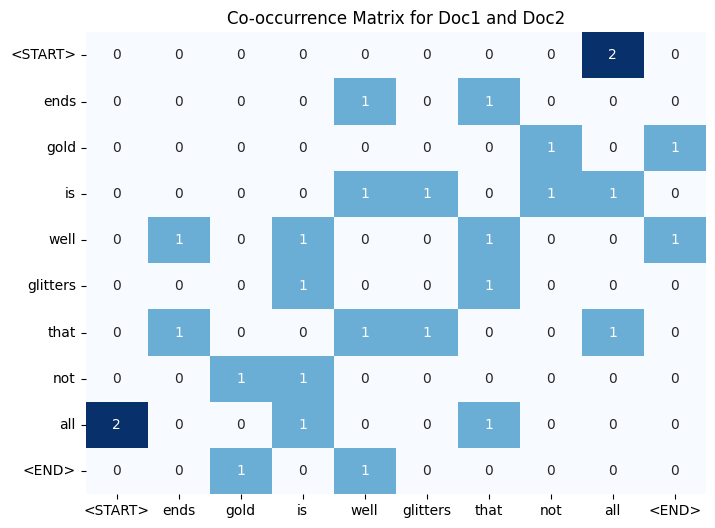

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Co-occurrence Matrix for Doc1 and Doc2")
plt.show()